<a href="https://colab.research.google.com/github/ryan0413/ryan_asl_alphabet/blob/master/Ryan_ASL_Alphabet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####https://www.kaggle.com/grassknoted/asl-alphabet

#####Keras建立卷積神經網路#####https://chtseng.wordpress.com/2017/09/23/%E5%AD%B8%E7%BF%92%E4%BD%BF%E7%94%A8keras%E5%BB%BA%E7%AB%8B%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF/

In [0]:
# Input data from git
! git clone https://jamiewu128@bitbucket.org/jamiewu128/asl_alphabet.git

Cloning into 'asl_alphabet'...
remote: Counting objects: 87036, done.
remote: Compressing objects: 100% (87034/87034), done.
remote: Total 87036 (delta 0), reused 87033 (delta 0)
Receiving objects: 100% (87036/87036), 1.01 GiB | 35.73 MiB/s, done.
Checking out files: 100% (87029/87029), done.


In [0]:
# Import libraries and packages
import numpy as np
import pandas as pd
import os

# keras libraries
import keras
from keras.preprocessing import image # 影象預處理模組
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers

import random
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# check path
print(os.listdir("../content/asl_alphabet"))

['asl_alphabet_train', '.git', 'README.md', 'asl_alphabet_test']


In [0]:
# 訓練與測試資料路徑參照
train_dir = '../content/asl_alphabet/asl_alphabet_train'
test_dir = '../content/asl_alphabet/asl_alphabet_test'

In [0]:
def load_unique():
    size_img = 128,128 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2GRAY)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

In [0]:
# 讀取標籤
images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

unique_labels =  ['Y', 'A', 'H', 'P', 'G', 'space', 'del', 'I', 'D', 'X', 'F', 'Q', 'L', 'C', 'T', 'J', 'M', 'Z', 'R', 'K', 'N', 'nothing', 'E', 'O', 'S', 'U', 'W', 'V', 'B']


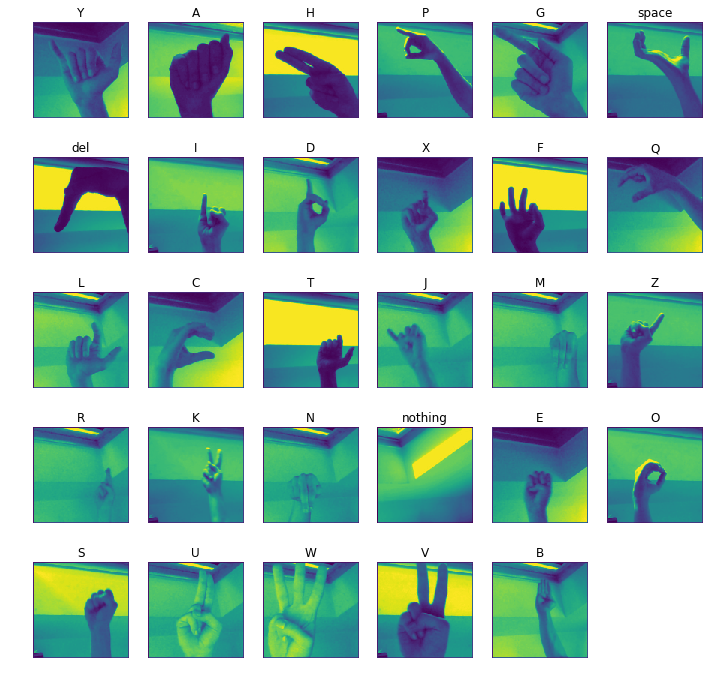

In [0]:
# 顯示圖片
fig = plt.figure(figsize = (12,12))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

# 顯示4*5張數
image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [0]:
# 設定標籤編號
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

In [0]:
def load_data(load_image_count, padding):  
    images = []
    labels = []
    size = 128,128
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir): # folder="A","B"...
        x=0
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):  
            x=x+1
            if x<load_image_count:                
                if x % padding != 0:
                    continue                  
                temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
                temp_img = cv2.resize(temp_img, size)
                images.append(temp_img)                
                if folder == 'A':
                    labels.append(labels_dict['A'])
                elif folder == 'B':
                    labels.append(labels_dict['B'])
                elif folder == 'C':
                    labels.append(labels_dict['C'])
                elif folder == 'D':
                    labels.append(labels_dict['D'])
                elif folder == 'E':
                    labels.append(labels_dict['E'])
                elif folder == 'F':
                    labels.append(labels_dict['F'])
                elif folder == 'G':
                    labels.append(labels_dict['G'])
                elif folder == 'H':
                    labels.append(labels_dict['H'])
                elif folder == 'I':
                    labels.append(labels_dict['I'])
                elif folder == 'J':
                    labels.append(labels_dict['J'])
                elif folder == 'K':
                    labels.append(labels_dict['K'])
                elif folder == 'L':
                    labels.append(labels_dict['L'])
                elif folder == 'M':
                    labels.append(labels_dict['M'])
                elif folder == 'N':
                    labels.append(labels_dict['N'])
                elif folder == 'O':
                    labels.append(labels_dict['O'])
                elif folder == 'P':
                    labels.append(labels_dict['P'])
                elif folder == 'Q':
                    labels.append(labels_dict['Q'])
                elif folder == 'R':
                    labels.append(labels_dict['R'])
                elif folder == 'S':
                    labels.append(labels_dict['S'])
                elif folder == 'T':
                    labels.append(labels_dict['T'])
                elif folder == 'U':
                    labels.append(labels_dict['U'])
                elif folder == 'V':
                    labels.append(labels_dict['V'])
                elif folder == 'W':
                    labels.append(labels_dict['W'])
                elif folder == 'X':
                    labels.append(labels_dict['X'])
                elif folder == 'Y':
                    labels.append(labels_dict['Y'])
                elif folder == 'Z':
                    labels.append(labels_dict['Z'])
                elif folder == 'space':
                    labels.append(labels_dict['space'])
                elif folder == 'del':
                    labels.append(labels_dict['del'])
                elif folder == 'nothing':
                    labels.append(labels_dict['nothing'])                
    
    images = np.array(images)
    images = images.astype('float32')/255.0 # 標準化，將值轉為0~1之間
    
    labels = keras.utils.to_categorical(labels) # Onehot encoding，將彼此間不相關且非有序的categories轉換為連續性且是有序數值
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [0]:
load_image_count = 3000
padding = 3
X_train, X_test, Y_train, Y_test = load_data(load_image_count, padding)

LOADING DATA FROM : Y | A | H | P | G | space | del | I | D | X | F | Q | L | C | T | J | M | Z | R | K | N | nothing | E | O | S | U | W | V | B | 
Loaded 27522 images for training, Train data shape = (27522, 128, 128, 3)
Loaded 1449 images for testing Test data shape = (1449, 128, 128, 3)


In [0]:
# 建立模型
def create_model():
    
    model = Sequential()
    
    # initializing CNN
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (128,128,3)))
    model.add(MaxPool2D(pool_size = [2,2]))
    
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [2,2]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [2,2]))
    
    model.add(BatchNormalization()) # 規一化
    
    model.add(Flatten()) # 將 feature maps 攤平放入一個向量中，建立平坦層(輸入層)
    
    model.add(Dropout(0.5)) # 丟棄
    
    # 全連接層
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001))) # 建立隱藏層 (512 個神經元)
    
    model.add(Dense(29, activation = 'softmax')) # 建立輸出層 (29 個神經元) 
    
    print("MODEL CREATED")
    model.summary()
    
    return model

In [0]:
model = create_model()

MODEL CREATED
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)       512    

In [0]:
def fit_model():
    model.compile(optimizer = 'adam', # 訓練時之最佳化方法使用 "adam" (快速收斂且準確度高)
                  loss = keras.losses.binary_crossentropy, # 損失函數使用交叉熵
                  metrics = ["accuracy"]) # 評估模型之方式為 accuracy (準確度)
    
    model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 15, validation_split = 0.2)
    #model_hist = model.model.fit_generator(...)
    return model_hist 

In [0]:
curr_model_hist = fit_model()

Train on 22017 samples, validate on 5505 samples
Epoch 1/15
22017/22017 [==============================] - 29s 1ms/step - loss: 0.2183 - acc: 0.9744 - val_loss: 0.1581 - val_acc: 0.9710
Epoch 2/15
22017/22017 [==============================] - 26s 1ms/step - loss: 0.1330 - acc: 0.9836 - val_loss: 0.1142 - val_acc: 0.9845
Epoch 3/15
22017/22017 [==============================] - 26s 1ms/step - loss: 0.1064 - acc: 0.9875 - val_loss: 0.1282 - val_acc: 0.9823
Epoch 4/15
22017/22017 [==============================] - 27s 1ms/step - loss: 0.1218 - acc: 0.9886 - val_loss: 0.0973 - val_acc: 0.9879
Epoch 5/15
22017/22017 [==============================] - 26s 1ms/step - loss: 0.0943 - acc: 0.9907 - val_loss: 0.0932 - val_acc: 0.9892
Epoch 6/15
22017/22017 [==============================] - 26s 1ms/step - loss: 0.0858 - acc: 0.9921 - val_loss: 0.0943 - val_acc: 0.9887
Epoch 7/15
22017/22017 [==============================] - 26s 1ms/step - loss: 0.0862 - acc: 0.9923 - val_loss: 0.1110 - val_acc:

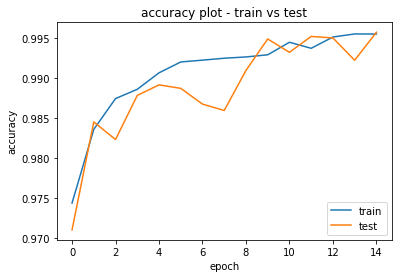

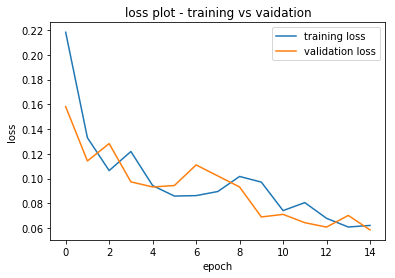

In [0]:
# 查看準確性
def plot_accuracy():
    plt.plot(curr_model_hist.history['acc'])
    plt.plot(curr_model_hist.history['val_acc'])
    plt.legend(['train', 'test'], loc='lower right')
    plt.title('accuracy plot - train vs test')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()
    return

# 查看丟失值
def plot_loss():
    plt.plot(curr_model_hist.history['loss'])
    plt.plot(curr_model_hist.history['val_loss'])
    plt.legend(['training loss', 'validation loss'], loc = 'upper right')
    plt.title('loss plot - training vs vaidation')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    return
  
plot_accuracy()
plot_loss()

In [0]:
# 評估
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy =", evaluate_metrics[1],"\nEvaluation loss =",evaluate_metrics[0])

1449/1449 [==============================] - 1s 491us/step

Evaluation Accuracy = 0.9964065478537476 
Evaluation loss = 0.056218400145087104


In [0]:
# 讀取測試集
def load_test_data():
    images = []
    names = []
    size = 128,128
    for image in os.listdir(test_dir):
        temp = cv2.imread(test_dir + '/' + image)
        temp = cv2.resize(temp, size)
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

In [0]:
# 預測測試資料
def give_predictions(test_data):
    predictions_classes = []
    for image in test_data:
        image = image.reshape(1,128,128,3)
        pred = model.predict_classes(image)
        predictions_classes.append(pred[0])
    return predictions_classes
  
predictions = give_predictions(test_images)
print(predictions)

[3, 26, 14, 22, 28, 17, 2, 21, 8, 2, 15, 10, 6, 13, 17, 12, 4, 23, 11, 5, 7, 19, 25, 18, 9, 16, 1, 24]


In [0]:
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)
print(predictions_labels_plot)

['D', 'space', 'O', 'W', 'nothing', 'R', 'C', 'V', 'I', 'C', 'P', 'K', 'G', 'N', 'R', 'M', 'E', 'X', 'L', 'F', 'H', 'T', 'Z', 'S', 'J', 'Q', 'B', 'Y']


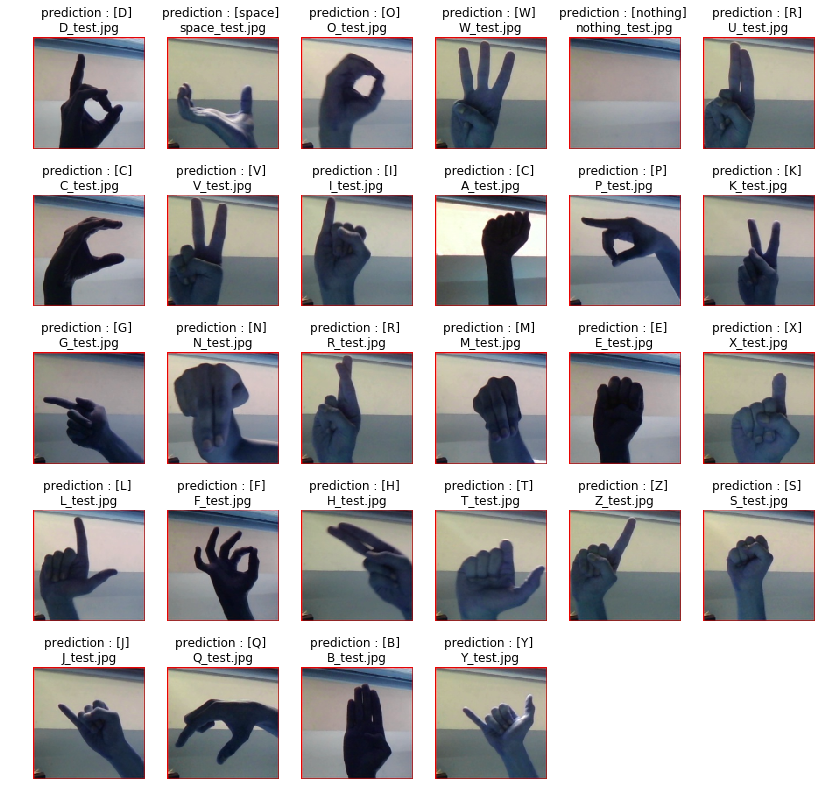

In [0]:
predfigure = plt.figure(figsize = (14,14))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

###匯出

In [0]:
# 匯出
model.save('Ryan_Final_Model_asl.h5')

###外部照片測試

In [0]:
# Input data from git
#! git clone https://ryan0413@bitbucket.org/ryan0413/rw_aiclassroom/asl-alphabet/ryan_test.git
! git clone https://bitbucket.org/ryan0413/ryan_asl_photos.git

Cloning into 'ryan_asl_photos'...
remote: Counting objects: 36, done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 1), reused 0 (delta 0)
Unpacking objects: 100% (36/36), done.


In [0]:
#ryan_test_dir = '../content/ryan_test/asl-alphabet/ryan_test'
ryan_test_dir = '../content/ryan_asl_photos/ryan_test'
#ryan_test_dir = '../content'
test_pic = 'ryan_A-2.jpg'

(200, 200)


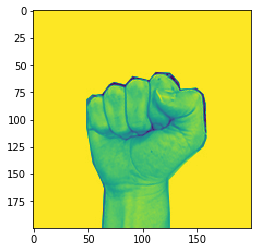

In [0]:
img = cv2.imread(ryan_test_dir + '/' + test_pic)
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_cvt.shape)
plt.imshow(img_cvt)
plt.show()

In [0]:
def load_single_test_data():
    images = []
    names = []
    size = 128,128
    
    for image in os.listdir(ryan_test_dir):
        temp = cv2.imread(ryan_test_dir + '/' + image)
        #temp = cv2.imread(ryan_test_dir + '/' + test_pic)
        temp = cv2.resize(temp, size)
        images.append(temp)
        names.append(image)
        print(image)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

In [0]:
def give_single_predictions(test_data):
    predictions_classes = []
    for image in test_data:
        image = image.reshape(1,128,128,3)
        pred = model.predict_classes(image)
        predictions_classes.append(pred[0])
    return predictions_classes

In [0]:
def get_single_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

In [0]:
image_single, image_single_name = load_single_test_data()
single_predictions = give_single_predictions(image_single)
single_predictions_labels_plot = get_single_labels_for_plot(single_predictions)

print(single_predictions)
print(single_predictions_labels_plot)

ryan_F.jpg
ryan_H.jpg
ryan_B.jpg
ryan_W.jpg
ryan_T.jpg
ryan_Y.jpg
ryan_A-2.jpg
ryan_A-1.jpg
ryan_G.jpg
[22, 15, 1, 22, 19, 19, 11, 12, 14]
['W', 'P', 'B', 'W', 'T', 'T', 'L', 'M', 'O']


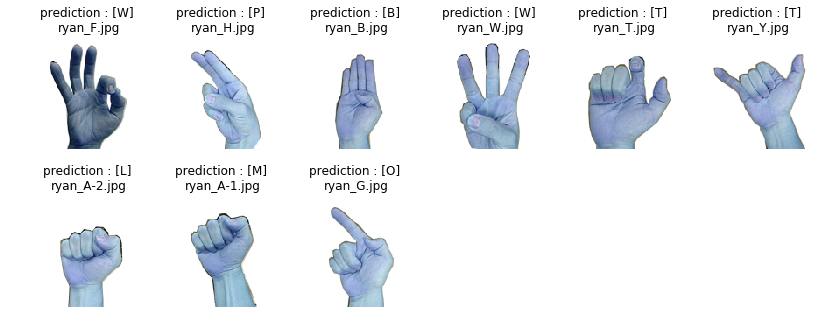

In [0]:
predfigure = plt.figure(figsize = (14,14))
def plot_ryan_image(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
for i in range(1, 10):
    plot_image_1(predfigure, image_single[image_index], image_single_name[image_index], single_predictions[image_index], single_predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()